In [1]:
import os
import tarfile
import urllib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset

HOUSING_PATH = os.path.join("datasets", "housing")

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


### Take a Quick Look at the Data Structure

In [3]:
housing = load_housing_data()

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()
housing["ocean_proximity"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


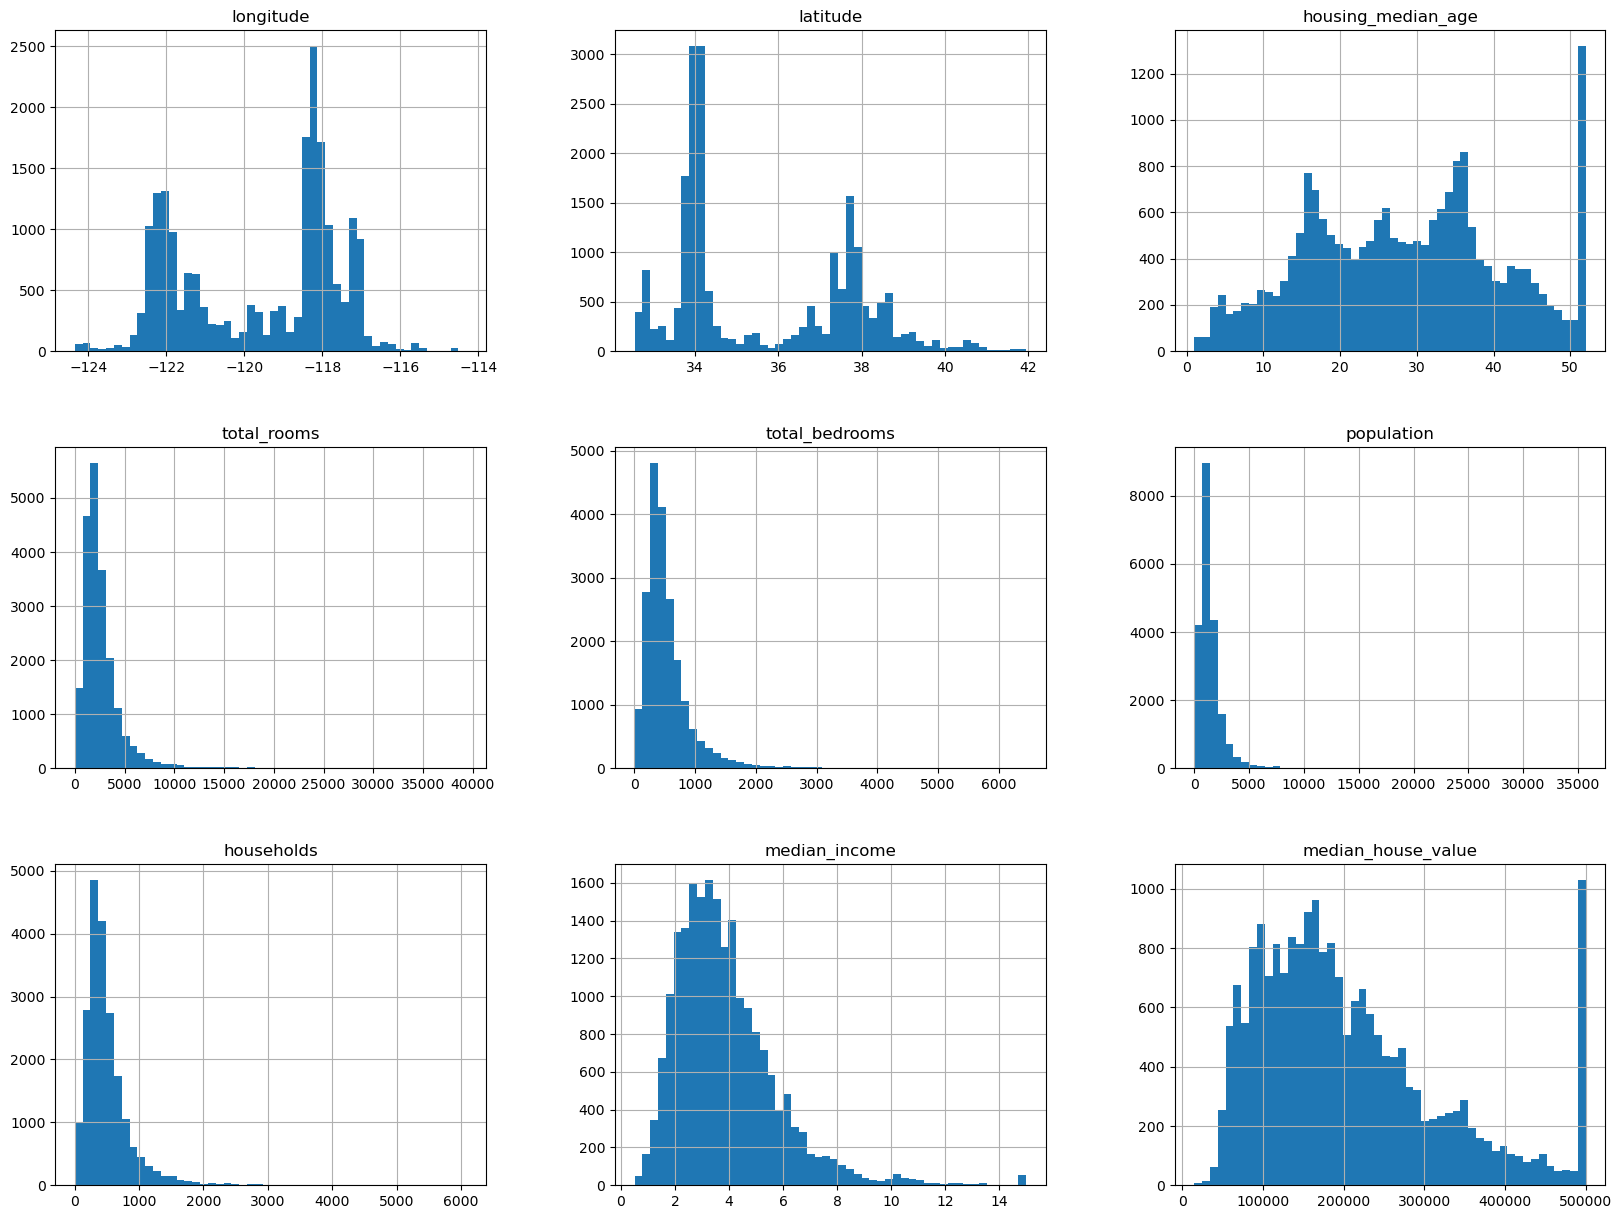

In [7]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

### Create a Test Set

In [8]:
# Making this notebook's output identical at every run
np.random.seed(42)

In [9]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [11]:
len(test_set)

4128

In [12]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
housing_with_id = housing.reset_index() # adds an "index" column
# train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")


In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [15]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [16]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<Axes: >

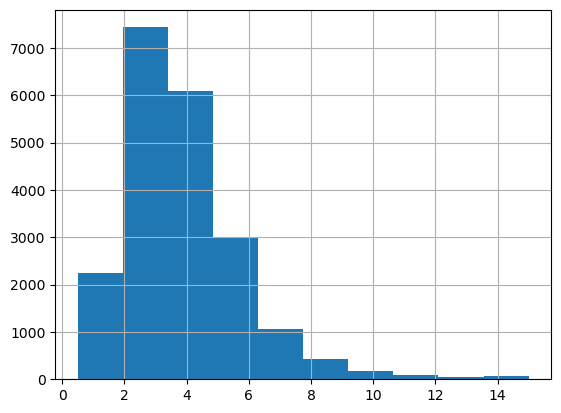

In [17]:
housing["median_income"].hist()

In [18]:
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

In [19]:
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

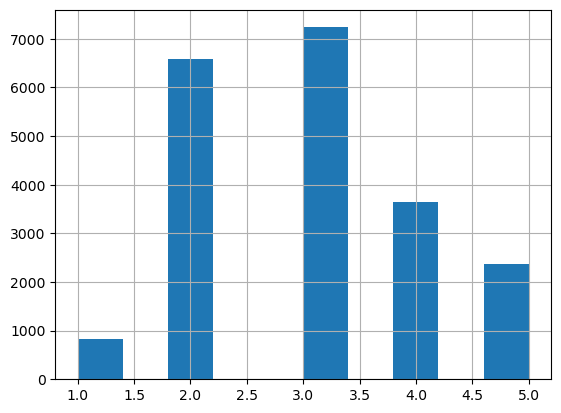

In [20]:
housing["income_cat"].hist()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [22]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [23]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set)
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [24]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [25]:
# Removing "income_cat" so the data will be back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [26]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


### Discover and Visualize the Data to Grain Insights

In [27]:
housing = strat_train_set.copy()

##### Visualizing Geographical Data

<Axes: xlabel='longitude', ylabel='latitude'>

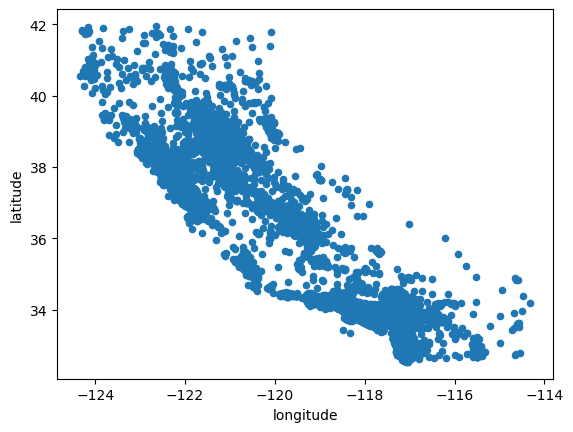

In [28]:
# A geographical scatter plot for all districts
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

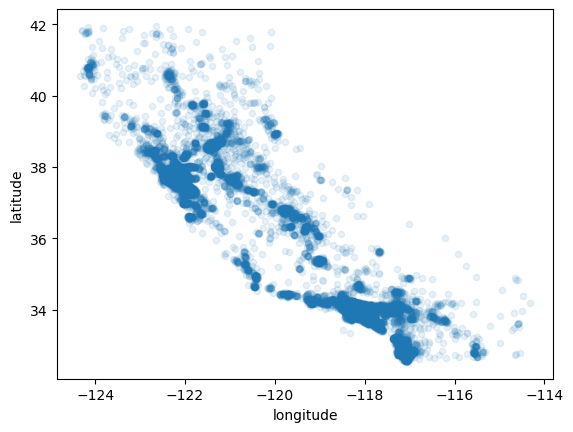

In [29]:
# Adding "alpha" to make it easier to visualize the places where there is a high density of data points
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

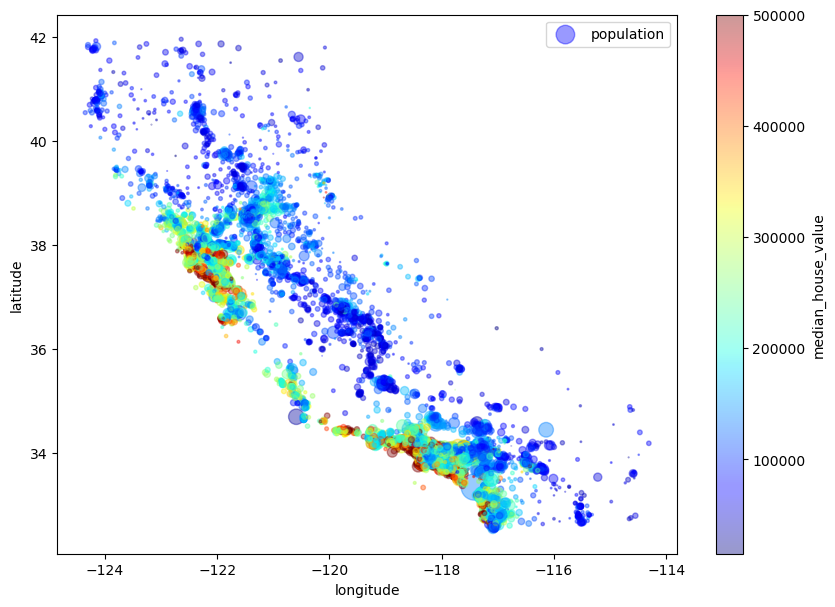

In [30]:
# Looking at the housing prices. 
# Radius of each circle represents the district's population (option s).
# The color represents the price (option c): blue=low values, red=high values. 
# Using predefined color map (option cmap) called "jet".

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10, 7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True
)
plt.legend()
plt.savefig("./images/02/housing_prices_scatterplot")

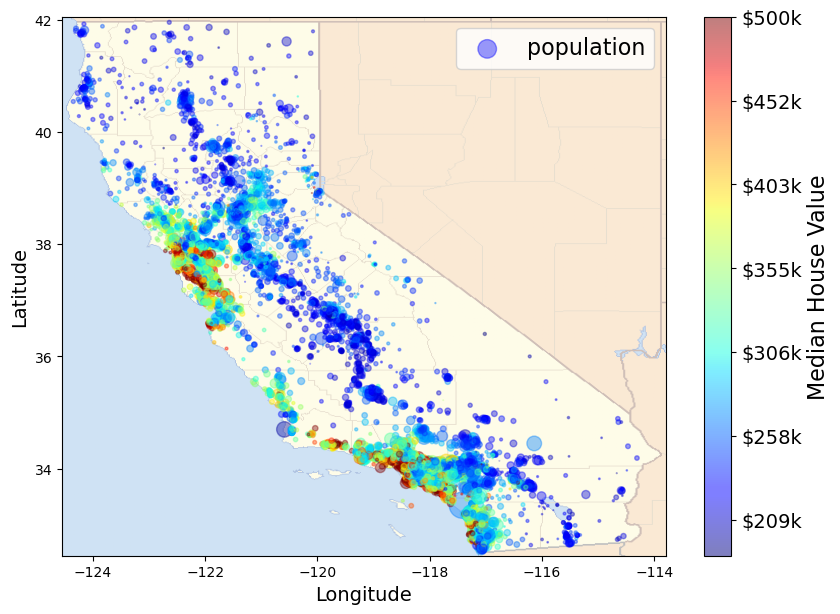

In [31]:
import matplotlib.image as mpimg
# Taking the california.png and combining it with the plot above
filename = "california.png"
california_img = mpimg.imread(os.path.join("./images/02/", filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 7),
        s=housing["population"]/100, label="population",
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=False, alpha=0.4)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
        cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values / prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label("Median House Value", fontsize=16)

plt.legend(fontsize=16)
plt.savefig("./images/02/california_housing_prices_plot.png")
plt.show()

#### Looking for Correlations

In [32]:
numeric_housing = housing.select_dtypes(include=[np.number])

In [33]:
corr_matrix = numeric_housing.corr()

In [34]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

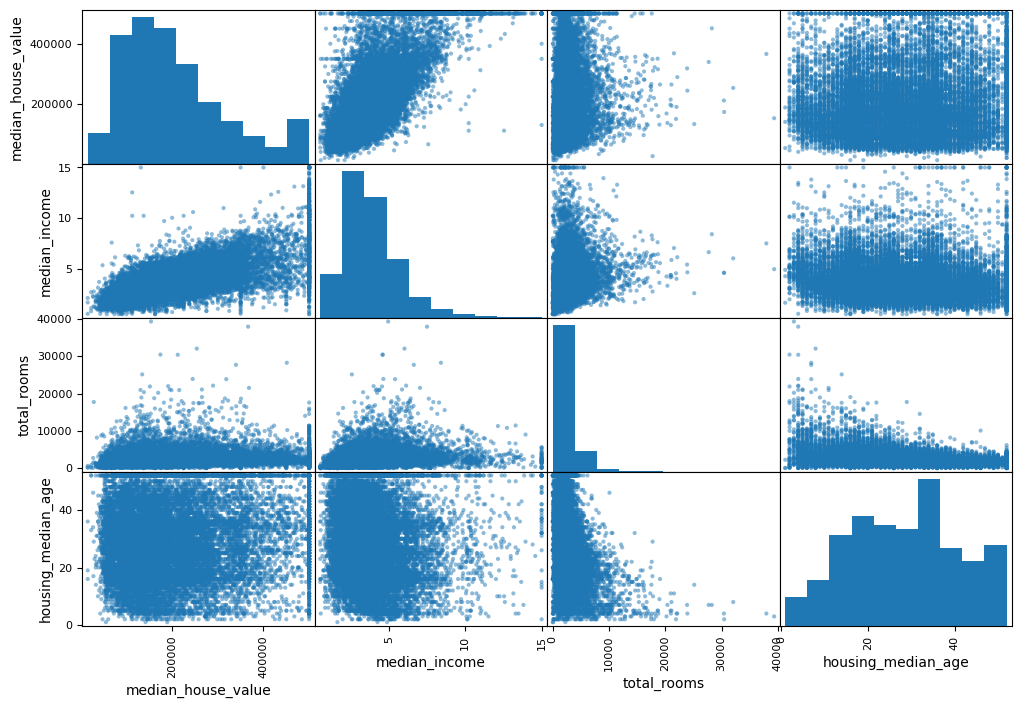

In [35]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.savefig("./images/02/scatter_matrix_plot.png")

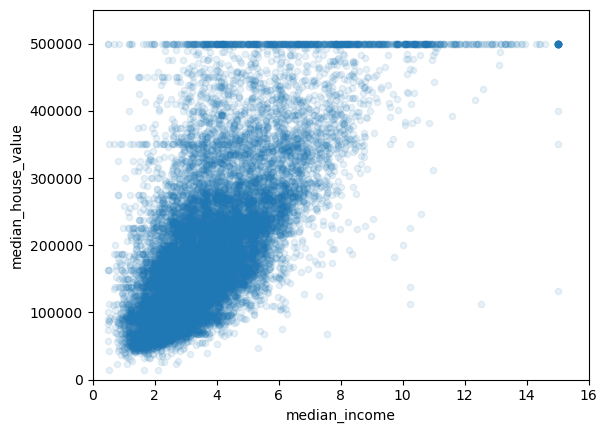

In [36]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])
plt.savefig("./images/02/income_vs_house_value_scatterplot.png")

#### Experimenting with Attribute Combinations

In [37]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [38]:
numeric_housing = housing.select_dtypes(include=[np.number])
corr_matrix = numeric_housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

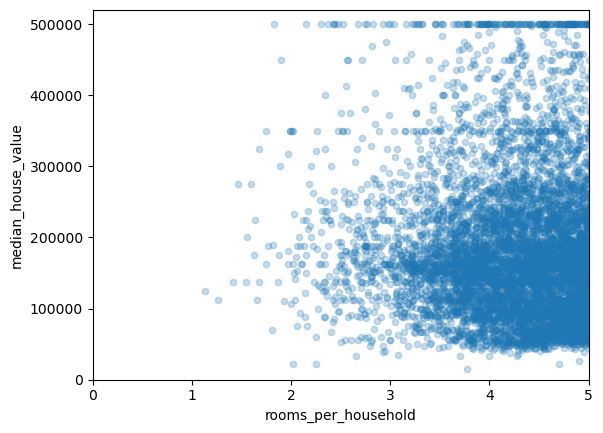

In [39]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.25)
plt.axis([0, 5, 0, 520000])
plt.show()

In [40]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


### Prepare the Data for Machine Learning Algorithms

In [41]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#### Data Cleaning

In the assignment the 3 options are listed:

```python
housing.dropna(subset=["total_bedrooms"])   # Option 1: Get rid of the corresponding districts.
housing.drop("total_bedrooms")              # Option 2: Get rid of the whole attribute.
median = housing["total_bedrooms"].median() # Option 3: Set the values to some value (zero, mean, median, etc.).
housing["total_bedrooms"].fillna(median, inplace=True)
```

To demonstrate each of them, I will create a copy of the housing dataset, but only keep the rows that
contain at least one null value. Then it will be easier to visualize exactly what each option does.

In [42]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [43]:
# Option 1:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [44]:
# Option 2:
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [45]:
# Option 3:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)

sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [46]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [47]:
# Removing the "ocean_proximity" since median can only be calculated on numerical attributes.
housing_num = housing.drop("ocean_proximity", axis=1)

In [48]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [49]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [50]:
# Checking that it's the same as manually computing the median of each attribute.
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [51]:
# Transforming the training set.
X = imputer.transform(housing_num)

In [52]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [53]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [54]:
imputer.strategy

'median'

In [55]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [56]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


#### Handling Text and Categorical Attributes

In [57]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [58]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [59]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [60]:
# Transforming data to binary attributes using one-hot encoding.
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [61]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [62]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformers

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin

# Column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Note that the indices (3, 4, 5, 6) are hardcoded for concision and clarity in the book,
but it would be much cleaner to get them dynamically, like this:

In [64]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names # get the column indices
    ]


In [65]:
# Since "housing_extra_attribs" is a NumPy array, the column names are lost.
# To recover a DataFrame:

housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns) + ["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


### Transformation Pipelines

In [66]:
# Small pipeline for the numerical attributes:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [67]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [68]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [69]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [70]:
housing_prepared.shape

(16512, 16)

### Select and Train a model

#### Training and Evaluating on the Training Set

In [71]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [72]:
# Try the Linear Regression model out on a few instances from the training set:

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [73]:
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [74]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [75]:
# Since Scikit-Learn 0.22, you can get the RMSE directly by calling the "mean_squared_error"
# function with squared=False.

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae


49438.66860915803

In [76]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [77]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Better Evaluation Using Cross-Validation

In [78]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [79]:
def display_scores(scores):
    print("Scores", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores [72251.22610062 70811.34799853 68000.08591434 71929.39104752
 69328.61392367 77963.99482744 71628.79228943 73511.78648072
 69045.58722762 69854.4073967 ]
Mean: 71432.52332065887
Standard deviation: 2696.6824522410743


In [80]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.328209818069


In [81]:
# Specifying "n_estimators=100" to be future-proof, since the default value is going to change to 100 
# in Scikit-Learn 0.22.

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [82]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [83]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


In [84]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69104.079982
std       3036.132517
min      64114.991664
25%      67077.398482
50%      68718.763507
75%      71357.022543
max      73997.080502
dtype: float64

In [85]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111095.06635291968

### Fine-tune Your Model

#### Grid Search

In [86]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # Try 12 (3x4) combinations of hyperparameters:
    {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]},
    # Then try 6 (2x3) combinations with bootstrap set as False:
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]}
]

forest_reg = RandomForestRegressor(random_state=42)

# Train across 5 folds, that's a total of (12+6)*5=90 rounds of training:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                        scoring="neg_mean_squared_error",
                        return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [87]:
# The best hyperparameter combination found:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [88]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [89]:
# Looking at the score of each hyperparameter comibination tested during the grid search:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [90]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.144204,0.002958,0.003001,3.234067e-07,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.119912e+09,-3.723465e+09,...,-4.082592e+09,1.867375e+08,18,-1.155630e+09,-1.089726e+09,-1.153843e+09,-1.118149e+09,-1.093446e+09,-1.122159e+09,2.834288e+07
1,0.478893,0.004451,0.008612,4.778348e-04,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.973521e+09,-2.810319e+09,...,-3.015803e+09,1.139808e+08,11,-5.982947e+08,-5.904781e+08,-6.123850e+08,-5.727681e+08,-5.905210e+08,-5.928894e+08,1.284978e+07
2,1.457362,0.030710,0.025250,2.214079e-03,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.801229e+09,-2.671474e+09,...,-2.796915e+09,7.980892e+07,9,-4.412567e+08,-4.326398e+08,-4.553722e+08,-4.320746e+08,-4.311606e+08,-4.385008e+08,9.184397e+06
3,0.249418,0.002228,0.003601,4.898625e-04,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.528743e+09,-3.490303e+09,...,-3.609050e+09,1.375683e+08,16,-9.782368e+08,-9.806455e+08,-1.003780e+09,-1.016515e+09,-1.011270e+09,-9.980896e+08,1.577372e+07
4,0.811170,0.002013,0.008904,1.976508e-04,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.742620e+09,-2.609311e+09,...,-2.755726e+09,1.182604e+08,7,-5.063215e+08,-5.257983e+08,-5.081984e+08,-5.174405e+08,-5.282066e+08,-5.171931e+08,8.882622e+06
5,2.431796,0.024922,0.024859,5.871555e-04,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.522176e+09,-2.440241e+09,...,-2.518759e+09,8.488084e+07,3,-3.776568e+08,-3.902106e+08,-3.885042e+08,-3.830866e+08,-3.894779e+08,-3.857872e+08,4.774229e+06
6,0.336434,0.002581,0.003601,4.900963e-04,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.362127e+09,-3.311863e+09,...,-3.371513e+09,1.378086e+08,13,-8.909397e+08,-9.583733e+08,-9.000201e+08,-8.964731e+08,-9.151927e+08,-9.121998e+08,2.444837e+07
7,1.124013,0.011736,0.008489,6.120470e-04,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.622099e+09,-2.669655e+09,...,-2.654240e+09,6.967978e+07,5,-4.939906e+08,-5.145996e+08,-5.023512e+08,-4.959467e+08,-5.147087e+08,-5.043194e+08,8.880106e+06
8,3.444592,0.030222,0.023600,5.060572e-04,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.446142e+09,-2.446594e+09,...,-2.496981e+09,7.357046e+07,2,-3.760968e+08,-3.876636e+08,-3.875307e+08,-3.760938e+08,-3.861056e+08,-3.826981e+08,5.418747e+06
9,0.452271,0.007816,0.003217,4.026837e-04,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.590333e+09,-3.232664e+09,...,-3.468718e+09,1.293758e+08,14,-9.505012e+08,-9.166119e+08,-9.033910e+08,-9.070642e+08,-9.459386e+08,-9.247014e+08,1.973471e+07


### Randomized Search

In [91]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    "n_estimators": randint(low=1, high=200),
    "max_features": randint(low=1, high=8)
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring="neg_mean_squared_error", random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023F18D73460>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023F18D73370>},
                   random_state=42, scoring='neg_mean_squared_error')

In [92]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


### Analyze the Best Models and Their Errors

In [93]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [94]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204355, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887772, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

### Evaluate Your System on the Test Set

In [95]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)   # => evaluates to approx. 47,730.2

In [96]:
final_rmse

47873.26095812988

In [97]:
# Compute a 95% confidence interval for the test RMSE:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))


array([45893.36082829, 49774.46796717])

In [98]:
# Could compute the interval manually like this:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45893.360828285535, 49774.46796717361)

In [99]:
# Alternatively, you could use a z-scores rather than t-scores:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45893.9540110131, 49773.92103065038)

# Extra material

### A full pipeline with both preparation and prediction

In [100]:
full_pipeline_with_predictor = Pipeline([
    ("preparation", full_pipeline),
    ("linear", LinearRegression())
])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([ 85657.90192014, 305492.60737488, 152056.46122456, 186095.70946094,
       244550.67966089])

### Model persistence using joblib

In [101]:
my_model = full_pipeline_with_predictor

In [102]:
import joblib

joblib.dump(my_model, "my_model.pkl")
my_model_loaded = joblib.load("my_model.pkl")

### Example SciPy distributions for RandomizedSearchCV

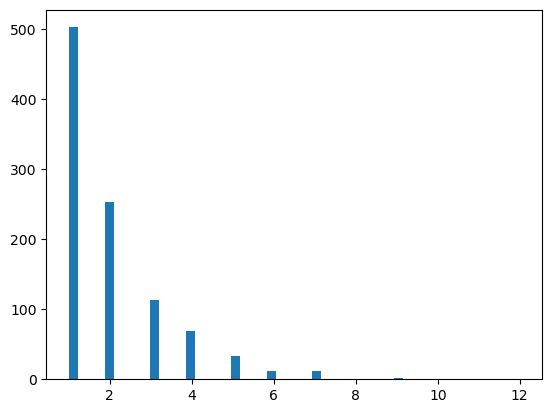

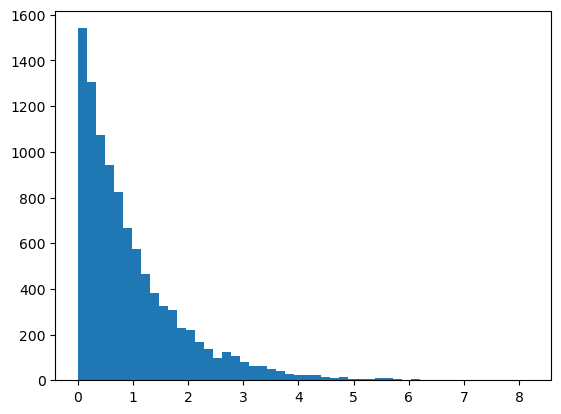

In [103]:
from scipy.stats import geom, expon

geom_distrib=geom(0.5).rvs(1000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)

plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

# Exercise Solutions

### Task 1.
> Try a Support Vector Machine regressor (sklearn.svm.SVR) with various hyperparameters, such as kernel="linear"
(with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don't worry about what these hyperparameters mean for now.
- How does the best SVR predictor perform?

In [104]:
# Warning: the following cell may take close to 30 minutes to run, or more depending on your hardware.

from sklearn.model_selection import GridSearchCV
param_grid = [
    {"kernel": ["linear"], "C": [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
    {"kernel": ["rbf"], "C": [1.0, 3.0, 10., 30., 100., 300., 1000.0],
    "gamma": [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}
]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring="neg_mean_squared_error", verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[CV] END ..............................C=10.0, kernel=linear; total time=   6.9s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.7s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.8s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.7s
[CV] END ..............................C=10.0, kernel=linear; total time=   6.7s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.7s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.6s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.8s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.7s
[CV] END ..............................C=30.0, kernel=linear; total time=   6.7s
[CV] END .............................C=100.0, kernel=linear; total time=   6.7s
[CV] END .............................C=100.0, kernel=linear; total time=   6.6s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [105]:
# The best model achieves the following score (evaluated using 5-fold cross validation):
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70286.61838178603

In [106]:
# That's much worse than the RandomForestRegressor. Let's check the best hyperparameters found:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

The linear kernel seems better than the RBF kernel. Notice that the value of `C` is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for `C` (removing the smallest values), because it is likely that higher values of `C` will be better.

### Task 2.
> Try replacing GridSearchCV with RandomizedSearchCV.

In [107]:
# Warning: the following cell may take close to 45 minutes to run, or more depending on your hardware.
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# Note: gamma is ignored when kernal is "linear".
param_distribs = {
    "kernel": ["linear", "rbf"],
    "C": reciprocal(20, 200000),
    "gamma": expon(scale=1.0)
}

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                            n_iter=50, cv=5, scoring="neg_mean_squared_error",
                            verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   7.0s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   7.1s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   7.4s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   7.1s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   6.9s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  13.2s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  13.1s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  13.3s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  13.3s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  13.2s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, kernel=rbf; total time=  12.2s
[CV] END C=84.14107900575871, g

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000023F18EDFDF0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000023F18D56940>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [108]:
# The best model achieves the following score (evaluated using 5-fold cross validation):
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse


54751.69009256622

In [109]:
# This is much closer to the performance of the RandomForestRegressor (but not quite there yet).
# Let's check the best hyperparameters found:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

This time the search found a good set of hyperparameters for the RBF kernel. Randomized search tends to find better hyperparameters than grid search in the same amount of time.

Looking at the exponential distribution that's used, with `scale=1.0`. Note that some samples are much larger or smaller than 1.0, but when you look at the log of the distribution, you can see that most values are actually concentrated roughly in the range of exp(-2) to exp(+2), which is about 0.1 to 7.4.

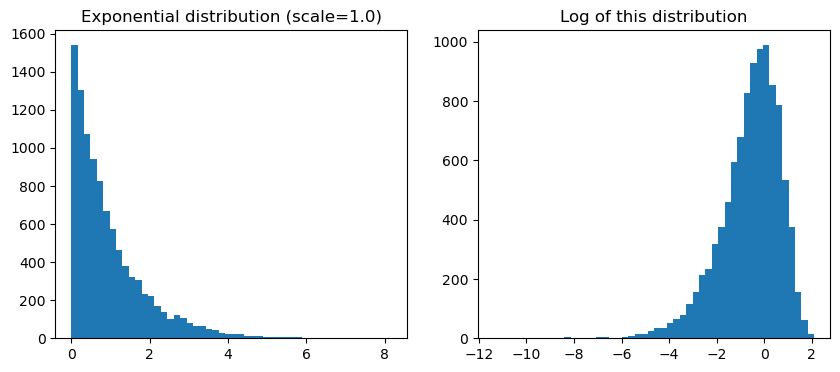

In [110]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The distribution that's used for `C` looks quite different: the scale of the samples is picked from a uniform distribution within a given range, which is why the right graph, which represents the log of the samples, looks roughly constant. This distribution is useful when you don't have a clue of what the target scale is.

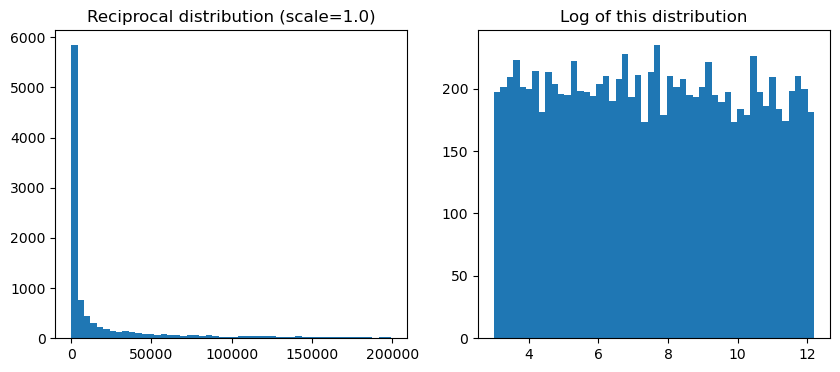

In [111]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The reciprocal distribution is useful when you have no idea what the scale of the hyperparameter should be (indeed, as you can see on the figure on the right, all scales are qually likely, withing the given range), whereas the exponential distribution is best when you know more or less what the scale of the hyperparameter should be.

### Task 3.
> Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [112]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [113]:
# Defining the number of top feature to keep:
k = 5

In [114]:
# Looking for the indices of the top k features:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12], dtype=int64)

In [115]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

In [116]:
# Double checking to see if these are indeed the top k features:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204355, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude')]

In [117]:
# Creating a new pipeline that runs the previously defined preparation pipeline, and adds top k feature selection:
preparation_and_feature_selection_pipeline = Pipeline([
    ("preparation", full_pipeline),
    ("feature_selection", TopFeatureSelector(feature_importances, k))
])

In [118]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [119]:
# Looking at the features of the first 3 instances:
housing_prepared_top_k_features[0:3]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

In [120]:
# Double checking that these are indeed the top k features:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

### Task 4.
> Try creating a single pipeline that does the full data preparation plus the final prediction.

In [121]:
prepare_select_and_predict_pipeline = Pipeline([
    ("preparation", full_pipeline),
    ("feature_selection", TopFeatureSelector(feature_importances, k)),
    ("svm_reg", SVR(**rnd_search.best_params_))
])

In [122]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(...
                 TopFeatureSelector(feature_importances=array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03]),
                                    k=5)),
                ('svm_reg',
                 SVR(C=157055.10989448498, gamma=0.26497040005002437))])

In [123]:
# Trying the full pipeline on a few instances:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 83384.49158095 299407.90439234  92272.03345144 150173.16199041]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0]


The full pipeline seems to work fine. Of course, the predictions are not fantastic: they would be better if it used the best `RandomForestRegressor` that were found earlier, rather than the best SVR.

### Task 5.
> Automatically explore som preparation options using `GridSearchCV`.

> Warning: the follower cell may take close to 45 minutes to run, or more depending on your hardware.

In [124]:
full_pipeline.named_transformers_["cat"].handle_unknown = "ignore"

param_grid = [{
    "preparation__num__imputer__strategy": ["mean", "median", "most_frequent"],
    "feature_selection__k": list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring="neg_mean_squared_error", verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   7.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  11.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  11.7s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  11.7s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=  11.7s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   7.8s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  11.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  12.3s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  11.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=  11.8s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   7.8s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=  11.7s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=  11.6s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=  11.9s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=  11.8s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   7.9s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=  12.0s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=  11.9s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=  12.0s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=  12.1s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   7.9s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=  12.0s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=  12.0s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=  12.2s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=  12.1s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   7.9s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=  11.9s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=  11.9s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=  12.0s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=  11.9s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   8.1s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=  12.0s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=  12.1s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=  12.1s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=  12.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   8.5s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  13.2s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  12.2s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  12.3s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=  12.0s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   8.1s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  12.1s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  12.3s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  12.9s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=  12.4s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  10.1s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  13.8s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  13.9s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  13.5s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=  13.0s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   8.6s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  13.0s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  12.9s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  12.8s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=  13.1s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   9.1s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  13.3s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  13.3s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  13.2s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=  13.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   9.2s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  14.2s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  13.2s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  12.9s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=  13.1s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   8.8s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  13.3s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  12.8s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  12.9s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=  13.1s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   8.6s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  13.1s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  12.8s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  12.9s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=  13.1s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   8.7s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  12.8s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  13.3s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  12.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=  13.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   8.7s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  12.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  13.2s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  13.2s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=  13.1s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   8.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  12.8s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  13.1s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  12.9s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=  13.1s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   9.1s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  13.7s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  13.6s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  13.2s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=  14.0s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   9.2s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  13.8s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  13.8s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  13.8s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=  13.6s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   9.1s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  13.7s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  13.3s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  13.5s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=  13.6s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  11.0s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  14.1s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  14.1s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  14.6s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=  14.6s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  10.7s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  14.8s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  15.4s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  14.6s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=  15.0s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  10.2s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  14.9s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  14.1s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  15.5s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=  14.6s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  13.2s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  17.5s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  17.6s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  17.4s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=  17.4s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  13.0s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  18.3s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  17.7s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  17.1s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=  17.8s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  11.3s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  18.4s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  17.2s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  16.1s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=  17.7s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  16.2s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  19.3s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  16.8s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  19.7s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=  18.0s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  13.5s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  19.5s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  19.1s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  19.7s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=  18.6s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  15.4s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  19.3s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  20.3s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  20.2s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=  17.8s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  14.6s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  20.8s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  20.8s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  21.3s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=  19.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  14.3s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  19.6s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  18.2s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  21.6s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=  19.8s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  17.0s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  19.8s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  21.0s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  21.1s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=  21.3s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  14.8s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  22.1s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  21.8s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  21.1s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=  19.9s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  16.8s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  22.3s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  19.6s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  19.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=  21.5s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  17.9s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  21.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  22.8s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  19.6s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=  21.9s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  18.2s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  20.7s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  22.1s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  23.3s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=  19.9s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  18.5s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  23.1s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  20.2s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  23.3s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=  23.4s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_respo

[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  18.4s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  19.5s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  22.7s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  20.9s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=  20.8s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=   0.0s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  21.6s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  22.8s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  22.0s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=  22.5s
[CV] 

c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\pipelin

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_inc...
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03]),
                                                           k=5)),
                                       ('svm_reg',
                                        SVR(C=157055.10989448498,
                                            gamma=0.26497040005002437))]),
             param_grid=[{'feature_selection__k': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16],
                          'preparation__num__imputer__strategy': ['mean',
                                                                  'median',
                                                                  'most_frequent']}],
             scoring='neg_mean_squared_error', verbose=2)

In [125]:
grid_search_prep.best_params_

{'feature_selection__k': 1, 'preparation__num__imputer__strategy': 'mean'}

The best imputer strategy is `most_frequent` and apparently almost all features are useful (15 out of 16). The last one (`ISLAND`) seems to just add some noise.